<a href="https://colab.research.google.com/github/rodgersxy/AirBnB_clone/blob/master/webscraping-datavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

sns.set()

In [2]:
# Create a list for all pages
pages = list(range(1,7))

# Create lists for columns needed for data frame
title = []
runtime = []
genre = []
imdb_rating = []
year = []
metascore = []
director_names = []
actors_names = []
gross = []

# Loop through all ages to get information
for page in tqdm(pages):
    params = {
        'st_dt': '',
        'mode': 'detail',
        'page': page,
        'sort': 'list_order,asc'
    }

    web_page_url = 'https://www.imdb.com/list/ls062911411/'

    response = requests.get(web_page_url, params=params)


    # create an instance of beautiful soup for film information
    film_soup = BeautifulSoup(response.content, 'html.parser')

    # Get the divs where the movie information is located
    film_info = film_soup.find_all('div', class_= 'lister-item-content')



    # Loop through film_info object to extract necessary information
    for item in tqdm(film_info):
        title.append((item.a.string))

        time_ = item.find('span', class_ = 'runtime')
        runtime.append(time_.string)

        genre_= item.find('span', class_ = 'genre')
        genre.append(((genre_.string).replace('\n', '')).strip())

        rate = item.find('span',class_ = 'ipl-rating-star__rating')
        imdb_rating.append(float(rate.string))

        year_ = item.find('span', class_ = 'lister-item-year text-muted unbold').string.split()
        if len(year_) <= 1:
            year.append(int(year_[0][1:5]))
        else:
            year.append(int(year_[1][1:5]))

        if item.find('span', class_ = 'metascore favorable') == None:
            metascore.append(np.nan)
        else:
            metascore_ = item.find('span', class_ = 'metascore favorable').string.strip()
            metascore.append(int(metascore_))


    # Create an instance of beautiful soup for directors and actors information
    directors_actors_soup = BeautifulSoup(response.content, 'html.parser')

    # Retrieve all tags and links that have directors and actors information
    director_links = directors_actors_soup.find_all('p', {'class': 'text-muted text-small'})

    directors_info = []
    for links in director_links:
        directors_info.append(links.a)

    # Retreving director names. Ensuring the list is 100
    for name in tqdm(directors_info):
        if name != None:
            director_names.append(name.string)

    # Retreive actors information
    actors_links = []
    for each_tag in directors_actors_soup.find_all('p', {'class': 'text-muted text-small'}):
        if each_tag.find_all('a') != []:
            actors_links.append(each_tag.findAll('a')[1:])


    for links in actors_links:
        each_name = []
        for each_link in tqdm(links):
            each_name.append(each_link.string)
        actors_names.append(each_name)


    # Retrieve list for gross
    list_of_grossEarnings = []
    for i in directors_actors_soup.find_all('p', {'class': 'text-muted text-small'}):
        list_of_grossEarnings.append(i.findAll('span', {'name': 'nv' }))


    for lists in tqdm(list_of_grossEarnings):
        if len(lists) > 1:
            gross.append(lists[1].string)
        elif len(lists) == 1:
            gross.append('N/A')

print('Done Scrapping!')

100%|██████████| 100/100 [00:00<00:00, 453.95it/s]

100%|██████████| 300/300 [00:00<00:00, 455242.84it/s]

100%|██████████| 4/4 [00:00<00:00, 30066.70it/s]

100%|██████████| 4/4 [00:00<00:00, 33825.03it/s]

100%|██████████| 5/5 [00:00<00:00, 42974.43it/s]

100%|██████████| 4/4 [00:00<00:00, 36002.61it/s]

100%|██████████| 4/4 [00:00<00:00, 35544.95it/s]

100%|██████████| 4/4 [00:00<00:00, 33893.37it/s]

100%|██████████| 4/4 [00:00<00:00, 37200.04it/s]

100%|██████████| 4/4 [00:00<00:00, 24244.53it/s]

100%|██████████| 4/4 [00:00<00:00, 26420.81it/s]

100%|██████████| 4/4 [00:00<00:00, 38043.57it/s]

100%|██████████| 4/4 [00:00<00:00, 36631.48it/s]

100%|██████████| 5/5 [00:00<00:00, 47662.55it/s]

100%|██████████| 4/4 [00:00<00:00, 26011.19it/s]

100%|██████████| 4/4 [00:00<00:00, 38043.57it/s]

100%|██████████| 4/4 [00:00<00:00, 40136.88it/s]

100%|██████████| 4/4 [00:00<00:00, 37871.82it/s]

100%|██████████| 4/4 [00:00<00:00, 32832.13it/s]

100%|██████████| 4/4 [00:00<00:00, 38746.46

Done Scrapping!


In [3]:
# Check each list to ensure we have 517 entries
check = [title, runtime, genre, imdb_rating, year, metascore, director_names, actors_names,
         gross]
for each_list in check:
    print(len(each_list))

517
517
517
517
517
517
517
517
517


In [4]:
# Putting our data in a data frame
data_frame = pd.DataFrame({'Movie_title': title, 'Genre': genre, 'Director': director_names, 'Actors': actors_names, 'Duration': runtime, 'Year': year, 'IMDB Rating': imdb_rating, 'Meta Score': metascore, 'Gross earnings': gross}, index=range(1, len(title)+1))
data_frame

,Movie_title,Genre,Director,Actors,Duration,Year,IMDB Rating,Meta Score,Gross earnings
1,Citizen Kane,"Drama, Mystery",Orson Welles,"[Orson Welles, Joseph Cotten, Dorothy Comingor...",119 min,1941,8.3,100.0,$1.59M
2,The Godfather,"Crime, Drama",Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",175 min,1972,9.2,100.0,$134.97M
3,The Wizard of Oz,"Adventure, Family, Fantasy",Victor Fleming,"[King Vidor, Judy Garland, Frank Morgan, Ray B...",102 min,1939,8.1,92.0,$2.08M
4,The Shawshank Redemption,Drama,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",142 min,1994,9.3,82.0,$28.34M
5,Pulp Fiction,"Crime, Drama",Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",154 min,1994,8.9,95.0,$107.93M
...,...,...,...,...,...,...,...,...,...
513,From Here to Eternity,"Drama, Romance, War",Fred Zinnemann,"[Burt Lancaster, Montgomery Clift, Deborah Ker...",118 min,1953,7.6,85.0,$30.50M
514,Walk the Line,"Biography, Drama, Music",James Mangold,"[Joaquin Phoenix, Reese Witherspoon, Ginnifer ...",136 min,2005,7.8,72.0,$119.52M
515,The Last Emperor,"Biography, Drama, History",Bernardo Bertolucci,"[John Lone, Joan Chen, Peter O'Toole, Ruocheng...",163 min,1987,7.7,76.0,$43.98M
516,Mutiny on the Bounty,"Adventure, Biography, Drama",Frank Lloyd,"[Charles Laughton, Clark Gable, Franchot Tone,...",132 min,1935,7.6,87.0,N/A


In [5]:
# Exploring Shape of the data frame
data_frame.shape

(517, 9)

In [6]:
# checking for null values
data_frame.isnull().any()

Movie_title       False
Genre             False
Director          False
Actors            False
Duration          False
Year              False
IMDB Rating       False
Meta Score         True
Gross earnings    False
dtype: bool

In [7]:
# Checking the information about the data frame
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 1 to 517
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie_title     517 non-null    object 
 1   Genre           517 non-null    object 
 2   Director        517 non-null    object 
 3   Actors          517 non-null    object 
 4   Duration        517 non-null    object 
 5   Year            517 non-null    int64  
 6   IMDB Rating     517 non-null    float64
 7   Meta Score      468 non-null    float64
 8   Gross earnings  517 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 36.5+ KB


In [8]:
# Checking data types of each column
data_frame.dtypes

Movie_title        object
Genre              object
Director           object
Actors             object
Duration           object
Year                int64
IMDB Rating       float64
Meta Score        float64
Gross earnings     object
dtype: object

In [10]:
def convert_gross(x):
    '''This function converts gross earnings to float'''
    if x == 'N/A':
        return np.nan
    else:
        converted = x.replace('$', '').replace('M', '')
        return float(converted)


# Converting Gross earnings to float
data_frame['Gross earnings'] = data_frame['Gross earnings'].map(convert_gross)

AttributeError: 'float' object has no attribute 'replace'

In [11]:
# Converting Duration to numerical
data_frame['Duration'] = data_frame['Duration'].str.extract('(\d+)').astype(int)

In [12]:
# Renaming columns in the data frame
data_frame.rename(columns={'Gross earnings': 'Gross earnings in millions ($)', 'Duration': 'Duration (mins)'}, inplace= True)
data_frame.head()

,Movie_title,Genre,Director,Actors,Duration (mins),Year,IMDB Rating,Meta Score,Gross earnings in millions ($)
1,Citizen Kane,"Drama, Mystery",Orson Welles,"[Orson Welles, Joseph Cotten, Dorothy Comingor...",119,1941,8.3,100.0,1.59
2,The Godfather,"Crime, Drama",Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",175,1972,9.2,100.0,134.97
3,The Wizard of Oz,"Adventure, Family, Fantasy",Victor Fleming,"[King Vidor, Judy Garland, Frank Morgan, Ray B...",102,1939,8.1,92.0,2.08
4,The Shawshank Redemption,Drama,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",142,1994,9.3,82.0,28.34
5,Pulp Fiction,"Crime, Drama",Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",154,1994,8.9,95.0,107.93


from matplotlib import pyplot as plt
_df_0['Duration (mins)'].plot(kind='hist', bins=20, title='Duration (mins)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['IMDB Rating'].plot(kind='hist', bins=20, title='IMDB Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Meta Score'].plot(kind='hist', bins=20, title='Meta Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Movie_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Director').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Duration (mins)', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Year', y='IMDB Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='IMDB Rating', y='Meta Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Meta Score', y='Gross earnings in millions ($)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Duration (mins)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Movie_title')):
  _plot_series(series, series_name, i)
  fig.legend(title='Movie_title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Duration (mins)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Duration (mins)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Duration (mins)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Duration (mins)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Director')):
  _plot_series(series, series_name, i)
  fig.legend(title='Director', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Duration (mins)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['IMDB Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Movie_title')):
  _plot_series(series, series_name, i)
  fig.legend(title='Movie_title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('IMDB Rating')

from matplotlib import pyplot as plt
_df_15['Duration (mins)'].plot(kind='line', figsize=(8, 4), title='Duration (mins)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['IMDB Rating'].plot(kind='line', figsize=(8, 4), title='IMDB Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Meta Score'].plot(kind='line', figsize=(8, 4), title='Meta Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Genre'].value_counts()
    for x_label, grp in _df_19.groupby('Movie_title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Movie_title')
_ = plt.ylabel('Genre')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Director'].value_counts()
    for x_label, grp in _df_20.groupby('Genre')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Genre')
_ = plt.ylabel('Director')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Movie_title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Duration (mins)', y='Movie_title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Duration (mins)', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Director'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Duration (mins)', y='Director', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Movie_title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Year', y='Movie_title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [13]:
# Covert genres to a long string
genres_txt = ' '.join(data_frame['Genre'])

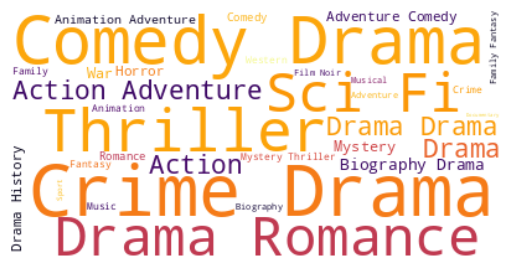

In [14]:
# Set stop words
stopwords = set(STOPWORDS)

# instantiate a word cloud object
genre_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    colormap= 'inferno'

)

# generate the word cloud
genre_wc.generate(genres_txt)

# display the word cloud
plt.imshow(genre_wc, interpolation='bilinear')
plt.axis('off')
plt.show()